# Random Signals and LTI-Systems

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Linear Prediction

In general, [predictive modeling](https://en.wikipedia.org/wiki/Predictive_modelling) aims at predicting outcomes using (statistical) models of the underlying processes. When applied to discrete-time signals, it refers to predicting future values from past ones. Different signal models are used for this purpose. Forward [linear prediction](https://en.wikipedia.org/wiki/Linear_prediction) aims at predicting the actual value $x[k]$ of a discrete random signal by a linear combination of its past values. It is frequently applied in lossless and lossy coding of signals. For instance, [linear predictive coding](https://en.wikipedia.org/wiki/Linear_predictive_coding) (LPC) is a major building block of many [speech coding](https://en.wikipedia.org/wiki/Speech_coding) and speech synthesis techniques.

### Theory

It is assumed that $x[k]$ is a real-valued discrete-time random signal. The prediction $\hat{x}[k]$ of the current sample $x[k]$ is computed from a weighted superposition of the past $N$ samples

\begin{equation}
\hat{x}[k] = \sum_{\kappa = 1}^{N} h[\kappa, k] \, x[k - \kappa]
\end{equation}

where $N$ denotes the order of the predictor and $h[\kappa, k]$ the weights of the past $N$ samples $x[k - \kappa]$ at time-instant $k$. The weights might differ for different time-instants. This constitutes a [moving average](https://en.wikipedia.org/wiki/Moving-average_model) (MA) model or a linear filter with finite impulse response (FIR). Therefore the weights $h[\kappa, k]$ can be interpreted as the filter coefficients of a time-variant non-recursive FIR filter.

It is beneficial to express above sum as an inner product of vectors. Combining the $N$ filter coefficients and the samples of the signal into the $N \times 1$ vectors (i.e. column vectors)

\begin{align}
\mathbf{x}[k] &= \left[ x[k], x[k-1], \dots, x[k-N+1] \right]^T \\
\mathbf{h}[k] &= \left[ h[1, k], h[2, k], \dots, h[N, k] \right]^T
\end{align}

yields

\begin{equation}
\hat{x}[k] = \mathbf{h}^T[k] \, \mathbf{x}[k-1]
\end{equation}

for the above sum equation.

The aim of linear prediction is to determine the filter coefficients such that the predicted signal $\hat{x}[k]$ matches the signal $x[k]$ as close as possible. In order to quantify the deviation between the signal $x[k]$ and its predicted value $\hat{x}[k]$ at time-instance $k$, the error signal

\begin{align}
e[k] &= x[k] - \hat{x}[k] \\
&= x[k] - \mathbf{h}^T[k] \, \mathbf{x}[k-1]
\end{align}

is introduced. The error $e[k]$ equals zero, if the signal $x[k]$ is perfectly predicted. In general, this cannot be achieved by a finite predictor order $N$. The problem of determining suitable filter coefficients could be approached by directly minimizing the (average) error. However, this constitutes a non-convex optimization problem. Instead, the quadratic average of the error $e[k]$ is typically used. This measure is known as [*mean squared error*](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE). It is defined as

\begin{align}
J &= E \left\{ | e[k] |^2 \right\} \\
&= E \left\{ | x[k] - \mathbf{h}^T[k] \, \mathbf{x}[k-1] |^2 \right\}
\end{align}

Above equation is referred to as [*cost function*](https://en.wikipedia.org/wiki/Loss_function) $J$ of the optimization problem. We aim at minimizing the cost function, hence minimizing the MSE between the signal $x[k]$ and its prediction $\hat{x}[k]$. The solution of this [convex optimization](https://en.wikipedia.org/wiki/Convex_optimization) problem is referred to as [minimum mean squared error](https://en.wikipedia.org/wiki/Minimum_mean_square_error) (MMSE) solution. Minimizing the cost function is achieved by calculating its gradient with respect to the filter coefficients [[Haykin](http://localhost:8888/notebooks/index.ipynb#Literature)]

\begin{align}
\nabla_\mathbf{h} J &= -2 E \left\{ x[k-1] (x[k] - \mathbf{h}^T[k] \mathbf{x}[k-1]) \right\} \\
&= - 2 \mathbf{r}[k] + 2 \mathbf{R}[k-1] \mathbf{h}[k]
\end{align}

where

\begin{align}
\mathbf{R}[k] &= E \{ \mathbf{x}[k] \mathbf{x}^T[k] \} \\
\mathbf{r}[k] &= E \{ \mathbf{x}[k-1] x[k] \}
\end{align}

denote the $N \times N$ auto-correlation matrix and $N \times 1$ cross-correlation vector, respectively. The elements of the auto-correlation matrix $\mathbf{R}[k]$ can be interpreted by expanding the outer product $\mathbf{x}[k] \mathbf{x}^T[k]$ and using the definition of the auto-correlation function (ACF)

\begin{equation}
\mathbf{R}[k] = \left[
\begin{matrix}
\varphi_{xx}[k,k] & \varphi_{xx}[k,k-1] & \dots & \varphi_{xx}[k,k-N+1] \\
\varphi_{xx}[k-1,k] & \varphi_{xx}[k-1,k-1] & \dots & \varphi_{xx}[k-1,k-N+1] \\
\vdots & \vdots & \ddots & \vdots \\
\varphi_{xx}[k-N+1,k] & \varphi_{xx}[k-N+1,k-1] & \dots & \varphi_{xx}[k-N+1,k-N+1]
\end{matrix}
\right]
\end{equation}

The matrix is composed from the values of the ACF $\varphi_{xx}[k_1, k_2]$ for all combinations of time indexes. It is symmetric with respect to its main diagonal. The elements on the main diagonal constitute the quadratic means for the respective time indexes. The elements of the cross-correlation vector $\mathbf{r}[k]$ are given as

\begin{equation}
\mathbf{r}[k] = \left[
\begin{matrix}
\varphi_{xx}[k-1,k] \\
\varphi_{xx}[k-2,k] \\
\vdots \\
\varphi_{xx}[k-N,k]
\end{matrix}
\right]
\end{equation}

As the MMSE solution constitutes a convex optimization problem, the minimum of the cost function is found by setting its gradient to zero, $\nabla_\mathbf{h} J = 0$. Rearranging terms this results in the *Wiener-Hopf* equation

\begin{equation}
\mathbf{R}[k-1] \mathbf{h}[k] = \mathbf{r}[k] 
\end{equation}

If $\mathbf{R}[k-1]$ has full rank (which should hold due to the random signal assumption), the optimum filter coefficients in the MMSE sense are given as

\begin{equation}
\mathbf{h}[k] = \mathbf{R}^{-1}[k-1] \mathbf{r}[k], 
\end{equation}

i.e. solving the Wiener-Hopf equation by direct matrix inverse.

Note that various alternative solutions to the Wiener-Hopf equation have been developed which avoid the direct inversion of the auto-correlation matrix. For instance the [least-mean squares (LMS) filter](https://en.wikipedia.org/wiki/Least_mean_squares_filter) which uses steepest gradient descent to solve for $\mathbf{h}[k]$. This is also known as *Widrow-Hopf* solution.

### Example - Linear Prediction of a Speech Signal

In the following example, the principle of forward linear prediction is applied to the recording of a speech signal. The recording contains the stationary part of the vocal 'o'. This constitutes a random signal which can be considered reasonably well as wide-sense stationary (WSS). It follows from the properties of the ACF that

\begin{align}
\mathbf{R}[k] &= \mathbf{R} \\
\mathbf{r}[k] &= \mathbf{r} \\
\mathbf{h}[k] &= \mathbf{h} = \left[ h[1], h[2], \dots, h[N] \right]^T
\end{align}

where $h[k]$ denote the time-invariant weights of the predictor. As we only have access to one recorded instance of the vocal, we inherently assume wide-sense ergodicity. The expectations are computed by averaging with respect to time.

#### Computation of prediction filter

First the signal is loaded, conditioned and truncated

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

L = 32768  # total number of samples of signal
N = 8  # order of predictor (number of FIR coefficients)

# read and truncate audio file
fs, x = wavfile.read('../data/vocal_o_8k.wav')
x = np.asarray(x, dtype=float)/2**15  # 16 Bit integer -> float
x = x[:L]

The auto-correlation matrix and the cross-correlation vector are estimated by averaging with respect to time. For instance

\begin{equation}
\mathbf{R} \approx \frac{1}{L-N+1} \sum_{k = N}^{L} \mathbf{x}[k-1] \mathbf{x}^T[k-1]
\end{equation}

where $L$ denotes the total number of samples of $x[k]$.

In [2]:
R = np.zeros(shape=(N, N))
r = np.zeros(shape=(N, 1))

for k in np.arange(N, L):
    xk = np.expand_dims(np.flip(x[k-N:k]), 1)
    R += 1/(L+2-N) * xk * xk.T
    r += 1/(L+2-N) * xk * x[k]

Let's inspect the estimated auto-correlation matrix by plotting its values within a surface plot

<Figure size 288x288 with 0 Axes>

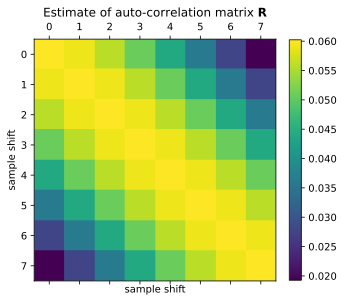

In [3]:
plt.figure(figsize=(3, 3))
plt.matshow(R)
plt.title(r'Estimate of auto-correlation matrix $\mathbf{R}$')
plt.colorbar(fraction=0.045)
plt.xlabel('sample shift')
plt.ylabel('sample shift');

As expected, the elements on the main diagonal have the largest values. The values decay with an increasing distance of the minor diagonals. Hence, the statistical dependencies between samples at two different time instants of the signal $x[k]$ decrease with an increasing distance between the samples. These statistical dependencies are exploited for the prediction of the current signal value from past ones.

Now the filter coefficients are computed and plotted.

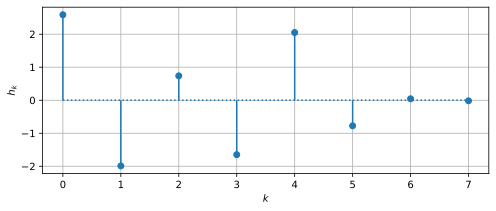

In [4]:
h = np.linalg.inv(R) @ r
h = np.squeeze(h)

plt.figure(figsize=(8, 3))
plt.stem(h, basefmt='C0:')
plt.xlabel(r'$k$')
plt.ylabel(r'$h_k$')
plt.grid()

#### Forward prediction

The value of the signal $x[k]$ at time-instant $k$ is predicted from its past $N$ values by evaluating the equation given above. This essentially constitutes a linear convolution $\hat{x}[k] = x[k] \ast h_{\mathrm{fp}}[k]$ with the forward prediction filter

\begin{equation}
h_{\mathrm{fp}}[k] = \begin{cases} 0 & \text{for } k=0 \\ h[k] & \text{for } 0 < k < N \end{cases}
\end{equation}

In order to evaluate the predictor, the predicted signal $\hat{x}[k]$ is computed for all time instants $k$ and plotted in comparison with the signal $x[k]$.

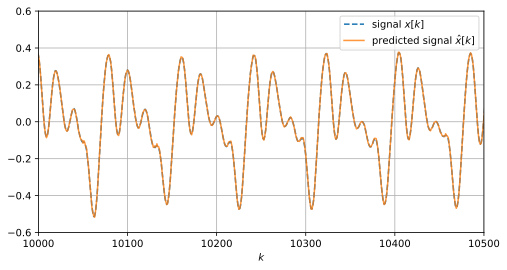

In [5]:
hfp = np.concatenate(([0], h))
xp = np.convolve(x, hfp)[:L]

plt.figure(figsize=(8, 4))
plt.plot(x, label=r'signal $x[k]$', linestyle='--')
plt.plot(xp, label=r'predicted signal $\hat{x}[k]$', alpha=.8)
plt.xlabel(r'$k$')
plt.axis([10000, 10500, -.6, .6])
plt.legend()
plt.grid()

As the difference between the actual signal and its prediction is quite low, the error $e[k]$ is computed and plotted for inspection. 

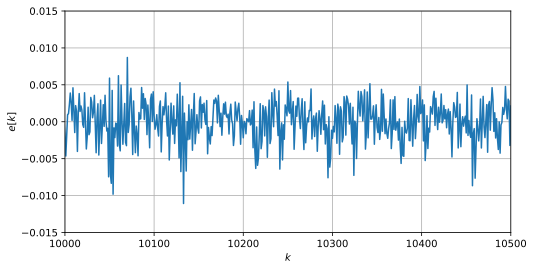

In [6]:
e = x - xp

plt.figure(figsize=(8, 4))
plt.plot(e)
plt.xlabel(r'$k$')
plt.ylabel(r'$e[k]$')
plt.axis([10000, 10500, -.015, .015])
plt.grid()

The amplitude of the error is much lower than the amplitude of the signal. This shows that the signal can be well predicted by the computed predictor. In order to quantify this, the variance of the signal and the error is computed as measure of their average power. Note, both signals are assumed to be zero-mean.

In [7]:
print('Variance of signal {:2.6f}'.format(np.var(x)))
print('Variance of error {:2.6f}'.format(np.var(e)))

Variance of signal 0.060221
Variance of error 0.000011


#### Prediction from residual error

The error signal may be rewritten as

\begin{align}
e[k] &= x[k] - \mathbf{h}^T \, \mathbf{x}[k-1] \\
&= h_{\mathrm{pe}}[k] \ast x[k]
\end{align}

where

\begin{equation}
h_{\mathrm{pe}}[k] = \begin{cases} 1 & \text{for } k=0 \\ - h[k] & \text{for } 0 < k < N \end{cases}
\end{equation}

denotes the prediction-error filter. Taking the $z$-transform of the error signal yields

\begin{equation}
E(z) = H_{\mathrm{pe}}(z) \cdot X(z)
\end{equation}

where for instance $E(z) = \mathcal{Z} \{ e[k] \}$. From this result it can be concluded that the signal $x[k]$ can be computed from the error signal $e[k]$ by inverse filtering with the prediction-error filter

\begin{equation}
x[k] = \underbrace{\mathcal{Z}^{-1} \left\{ \frac{1}{H_{\mathrm{pe}}(z)} \right\}}_{h_{\mathrm{pe}}^{-1}[k]} \ast e[k]
\end{equation}

The inverse of the prediction-error filter $h_{\mathrm{pe}}^{-1}[k]$ constitutes an pole-only (recursive) filter as the prediction filter is a zero-only (non-recursive) filter. In the following, the signal $x[k]$ is computed from the error signal $e[k]$ and plotted.

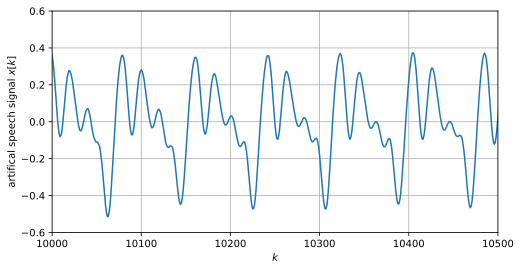

In [8]:
from scipy.signal import lfilter

hpe = np.concatenate(([1], -h))
xe = lfilter([1], hpe, e)

plt.figure(figsize=(8, 4))
plt.plot(xe)
plt.xlabel(r'$k$')
plt.ylabel(r'artifical speech signal $x[k]$')
plt.axis([10000, 10500, -.6, .6])
plt.grid()

#### Application - Speech synthesis using an artificial glottal signal

Linear prediction is used as [linear predictive coding](https://en.wikipedia.org/wiki/Linear_predictive_coding) (LPC) in the coding and synthesis of speech signals. The latter application is briefly presented in the sequel. It bases on the [source-filter model](https://en.wikipedia.org/wiki/Source%E2%80%93filter_model) of human speech production. Here speech production is modeled as a sound source filtered by a linear acoustic filter. In the case of vocals, this sound source are the [vocal cords](https://en.wikipedia.org/wiki/Vocal_cords) which generate the periodic glottal signal. The [vocal tract](https://en.wikipedia.org/wiki/Vocal_tract) may be interpreted as an acoustic filter. Vocals are articulated by changing the air flow through the vocal cords, their state as well as the configuration of the vocal tract. Due to its acoustical properties, the vocal tract can be represented as a pole-only filter.

The basic idea of LPC-based speech synthesis is, that the inverse of the prediction-error filter is an pole-only filter. When interpreting the error signal $e[k]$ as glottal signal in the source-filter model, the inverse of the prediction-error filter can be used to generate the speech signal $x[k]$. A synthetic vocal may be generated by using a synthetic glottal signal. A simple model for the glottal signal is a mean-free periodic rectangular signal with a duty cycle of 1:10. The signal is generated and plotted for illustration.

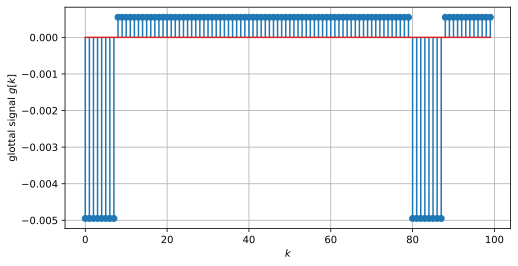

In [9]:
from scipy.signal import square


def glottal_signal(f0):
    '''Generates a synthetic glottal signal with fundamental frequency f0 in Hertz.'''
    w0 = 2 * np.pi * f0
    t = 1/fs * np.arange(L)
    g = 1/2 * (1 + square(w0*t, duty=1/10))

    return - g + 0.1


g = 0.0055 * glottal_signal(100)

plt.figure(figsize=(8, 4))
plt.stem(g[:100])
plt.xlabel(r'$k$')
plt.ylabel(r'glottal signal $g[k]$')
plt.grid()

The spectral contents of the error signal $e[k]$ and the synthetic glottal signal $g[k]$ are compared by estimating their power spectral densities (PSDs) using the [Welch technique](../spectral_estimation_random_signals/welch_method.ipynb).

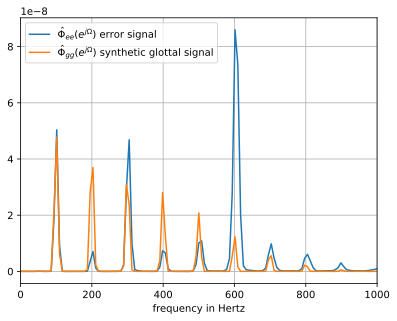

In [10]:
from scipy.signal import welch

f, Pee = welch(e, fs, nperseg=1024)
f, Pgg = welch(g, fs, nperseg=1024)
plt.plot(f, Pee,
         label=r'$\hat{\Phi}_{ee}(e^{j \Omega})$ error signal')
plt.plot(f, Pgg,
         label=r'$\hat{\Phi}_{gg}(e^{j \Omega})$ synthetic glottal signal')

plt.xlim([0, 1000])
plt.xlabel('frequency in Hertz')
plt.legend()
plt.grid()

The spectra of both signals constitute line-like spectra due to their periodicity. However, the levels of the spectral lines differ. This becomes most prominent around 600 Hertz. The synthetic glottal signal is now filtered with the inverse prediction-error filter in order to generate the synthetic speech signal.

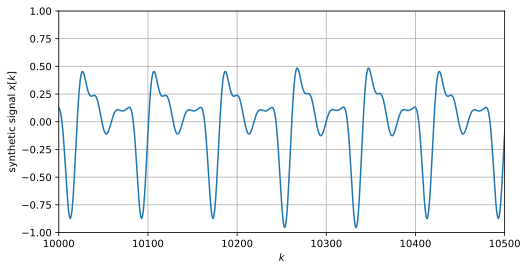

In [11]:
xa = lfilter([1], hpe, g)

plt.figure(figsize=(8, 4))
plt.plot(xa)
plt.xlabel(r'$k$')
plt.ylabel(r'synthetic signal $x[k]$')
plt.axis([10000, 10500, -1, 1])
plt.grid()

Visual comparison with the recorded speech signal shown above yields that the coarse structure of both is quite similar. The differences are a consequence of the simple glottal signal used. Both signals may also be compared aurally by listening to them.

In [12]:
wavfile.write('artificial_vocal.wav', fs, np.int16(xa*2**15))

**Recorded vocal**

<audio src="./../data/vocal_o_8k.wav" controls>Your browser does not support the audio element.</audio>[../data/vocal_o_8k.wav](../data/vocal_o_8k.wav)

**Synthesized vocal**

<audio src="./artificial_vocal.wav" controls>Your browser does not support the audio element.</audio>[./artificial_vocal.wav](./artificial_vocal.wav)

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.